In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_path = '/content/drive/MyDrive/MS/dataset/'
data_path = base_path + 'p95avg_negative.csv'

trace_dataframe = pd.read_csv(data_path, index_col=False, delimiter=',')
trace_dataframe.drop(['Unnamed: 0'],axis=1, inplace=True)
trace_dataframe = trace_dataframe[trace_dataframe['target'] == 1]
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour,target,delmaxavg,delmaxp95,delp95avg
5,KSmFW5rsD8YdwtcJN2KAZAxKozv4uP2JpXhkDCZ9Robde6...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65700,2591400,98.004433,3.212958,1.656107,Delay-insensitive,4,32,701.583333,2806.333333,1,94.791475,96.348326,-1.556851
7,QMAGiznbzlCFYU0bPBzaETsy2JqngJ4xdYpuomV+cTRiY/...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,97.430733,4.196203,2.849064,Delay-insensitive,4,32,701.666667,2806.666667,1,93.234530,94.581668,-1.347138
8,45h9UId70NtLuIagbK5HeRkbT3XXKcgcv4X+B0RqyqjX32...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28800,2591400,99.000613,3.659729,1.461811,Delay-insensitive,4,32,711.833333,2847.333333,1,95.340884,97.538802,-2.197918
11,FcG6ZGezY7BzUYWi/B9fdmI5KRMHP0YG3fGUPbS64zX5hW...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,85200,2591400,98.618475,2.997659,1.272409,Delay-insensitive,4,32,696.166667,2784.666667,1,95.620816,97.346066,-1.725250
13,OJKSawi3+wL1cVSV2omsFFLJ7UwpyuDmgkSyv65oRxbzO2...,iCR1jKA81Ru+LOfdGhCmqRTOGiV1ge7ZDdx6syn+Kv3lfE...,T7R1B80jhR/A/xPaTYUXAjsmtaH+Zodkl+RnyISpUaveM0...,0,2591400,99.358450,0.663474,0.527467,Delay-insensitive,2,2,719.833333,1439.666667,1,98.694976,98.830983,-0.136007


In [ ]:
cluster_df = trace_dataframe.drop(['vmid', 'subscriptionid', 'deploymentid', 'vmcategory', 'target'],axis=1, inplace=False)
cluster_df.head()

,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcorecountbucket,vmmemorybucket,lifetime,corehour,delmaxavg,delmaxp95,delp95avg
5,65700,2591400,98.004433,3.212958,1.656107,4,32,701.583333,2806.333333,94.791475,96.348326,-1.556851
7,65400,2591400,97.430733,4.196203,2.849064,4,32,701.666667,2806.666667,93.234530,94.581668,-1.347138
8,28800,2591400,99.000613,3.659729,1.461811,4,32,711.833333,2847.333333,95.340884,97.538802,-2.197918
11,85200,2591400,98.618475,2.997659,1.272409,4,32,696.166667,2784.666667,95.620816,97.346066,-1.725250
13,0,2591400,99.358450,0.663474,0.527467,2,2,719.833333,1439.666667,98.694976,98.830983,-0.136007


In [ ]:
cluster_df.shape

(261, 12)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Initialize KMeans and GaussianMixture models
kmeans = KMeans(n_clusters=3, 
                max_iter=1000,
                tol=1e-4)
gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')

# Fit and predict the algorithms
y_kmeans = kmeans.fit_predict(cluster_df)
y_gm = gm.fit_predict(cluster_df)
y_gm_proba = gm.predict_proba(cluster_df)

In [ ]:
print(y_kmeans.shape)
print(y_gm.shape)
print(y_gm_proba.shape)

(261,)
(261,)
(261, 3)


In [ ]:
trace_dataframe['kmeans'] = y_kmeans
trace_dataframe['gm'] = y_gm
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour,target,delmaxavg,delmaxp95,delp95avg,kmeans,gm
5,KSmFW5rsD8YdwtcJN2KAZAxKozv4uP2JpXhkDCZ9Robde6...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65700,2591400,98.004433,3.212958,1.656107,Delay-insensitive,4,32,701.583333,2806.333333,1,94.791475,96.348326,-1.556851,0,2
7,QMAGiznbzlCFYU0bPBzaETsy2JqngJ4xdYpuomV+cTRiY/...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,97.430733,4.196203,2.849064,Delay-insensitive,4,32,701.666667,2806.666667,1,93.234530,94.581668,-1.347138,0,2
8,45h9UId70NtLuIagbK5HeRkbT3XXKcgcv4X+B0RqyqjX32...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28800,2591400,99.000613,3.659729,1.461811,Delay-insensitive,4,32,711.833333,2847.333333,1,95.340884,97.538802,-2.197918,0,2
11,FcG6ZGezY7BzUYWi/B9fdmI5KRMHP0YG3fGUPbS64zX5hW...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,85200,2591400,98.618475,2.997659,1.272409,Delay-insensitive,4,32,696.166667,2784.666667,1,95.620816,97.346066,-1.725250,0,2
13,OJKSawi3+wL1cVSV2omsFFLJ7UwpyuDmgkSyv65oRxbzO2...,iCR1jKA81Ru+LOfdGhCmqRTOGiV1ge7ZDdx6syn+Kv3lfE...,T7R1B80jhR/A/xPaTYUXAjsmtaH+Zodkl+RnyISpUaveM0...,0,2591400,99.358450,0.663474,0.527467,Delay-insensitive,2,2,719.833333,1439.666667,1,98.694976,98.830983,-0.136007,0,1


In [ ]:
import matplotlib.pyplot as plt

def plot_results(data, X_label, Y_label):
  """Plot the results in one figure"""
  fig, ax = plt.subplots(1, 2)
  fig.set_size_inches(20, 8, forward=True)  
  title = ["kmeans", "gm"]

  data_0 = data[data['kmeans' ] == 0]
  data_1 = data[data['kmeans' ] == 1]
  data_2 = data[data['kmeans' ] == 2]
    
  ax[0].scatter(data_0[X_label], data_0[Y_label], c='r', label="Cluster 0")
  ax[0].scatter(data_1[X_label], data_1[Y_label], c='b', label="Cluster 1")
  ax[0].scatter(data_2[X_label], data_2[Y_label], c='g', label="Cluster 2")
  ax[0].set_title(title[0])
  ax[0].legend()

  data_0 = data[data['gm' ] == 0]
  data_1 = data[data['gm' ] == 1]
  data_2 = data[data['gm' ] == 2]

  ax[1].scatter(data_0[X_label], data_0[Y_label], c='r', label="Cluster 0")
  ax[1].scatter(data_1[X_label], data_1[Y_label], c='b', label="Cluster 1")
  ax[1].scatter(data_2[X_label], data_2[Y_label], c='g', label="Cluster 2")
  ax[1].set_title(title[1])
  ax[1].legend()
  
  plt.show()

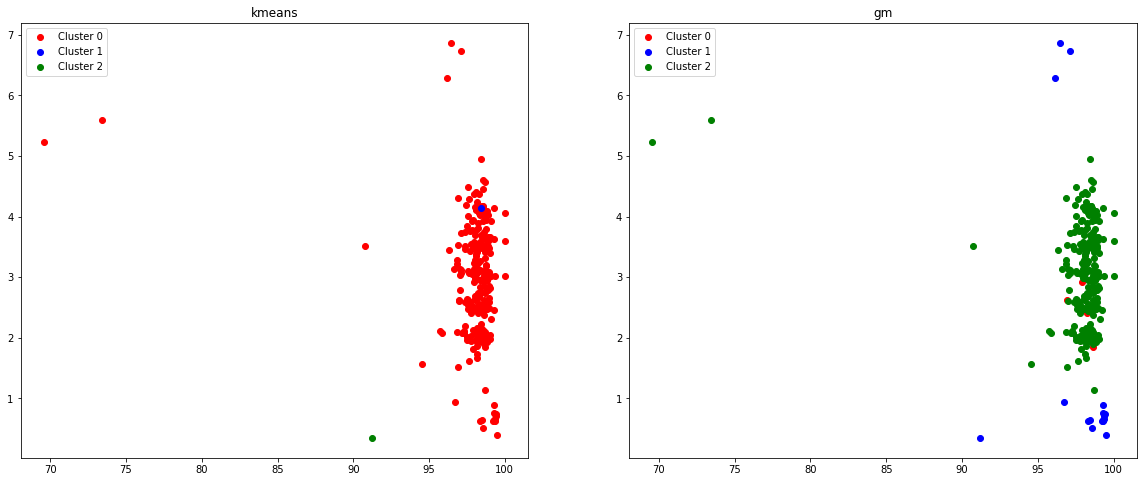

In [ ]:
plot_results(trace_dataframe, 'maxcpu', 'avgcpu')

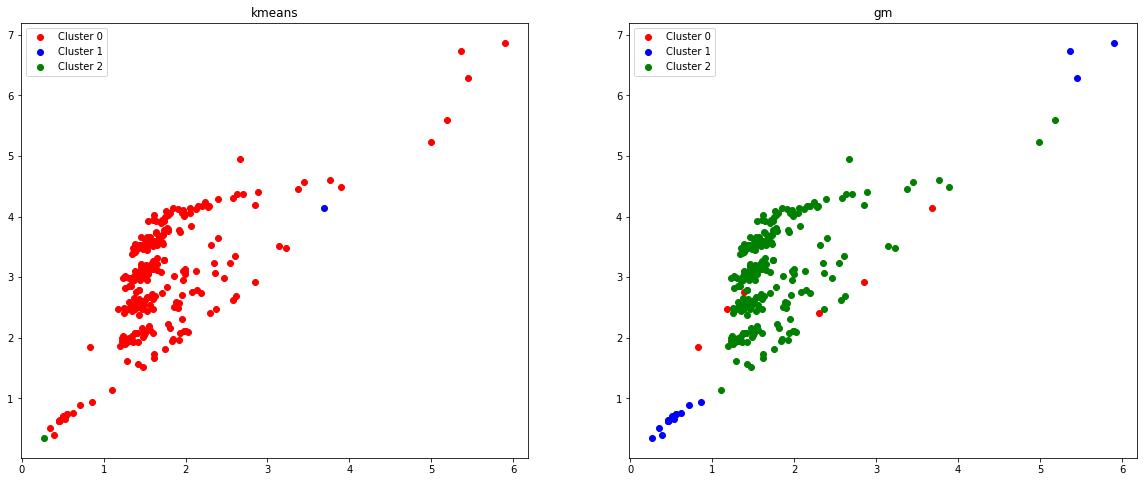

In [ ]:
plot_results(trace_dataframe, 'p95maxcpu', 'avgcpu')

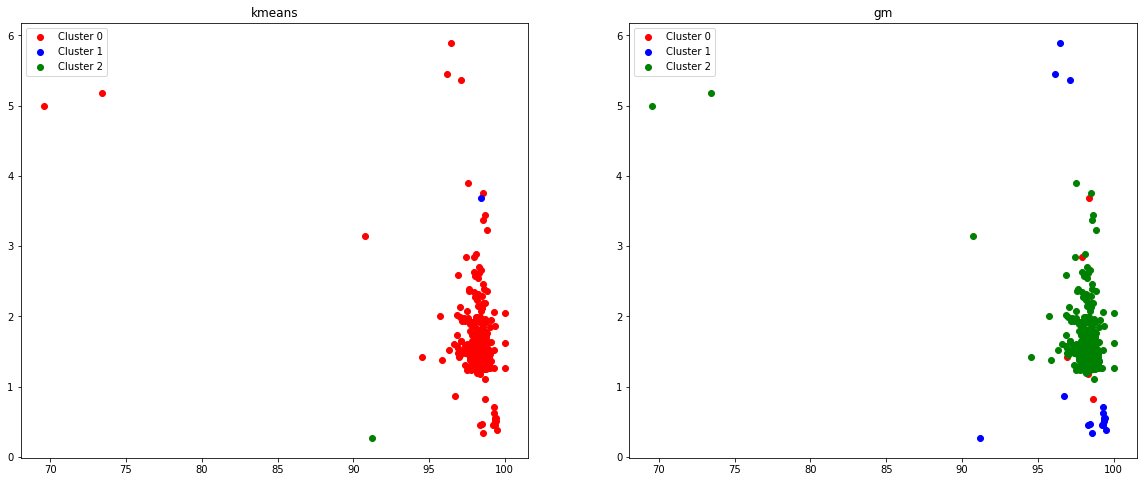

In [ ]:
plot_results(trace_dataframe, 'maxcpu', 'p95maxcpu')

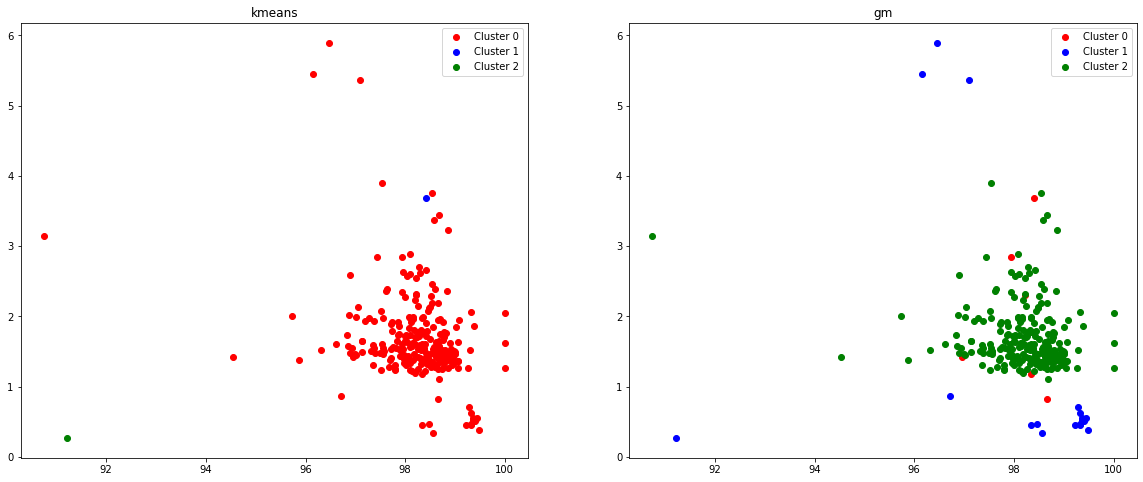

In [ ]:
# filtering vms 
# max > 90
filtered_dataframe = trace_dataframe[trace_dataframe['maxcpu'] > 90]
plot_results(filtered_dataframe, 'maxcpu', 'p95maxcpu')

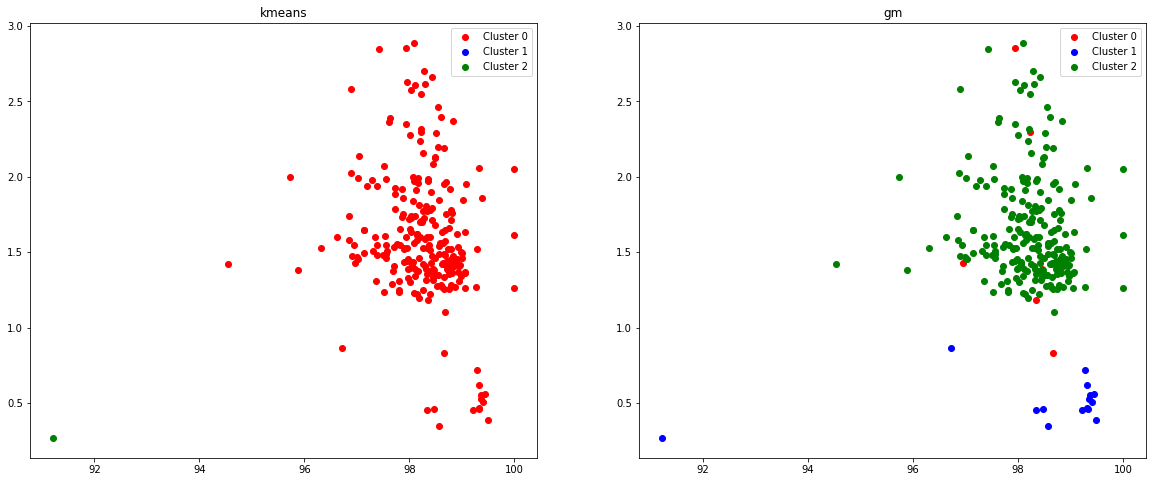

In [ ]:
filtered_dataframe = filtered_dataframe[filtered_dataframe['p95maxcpu'] < 3]
plot_results(filtered_dataframe, 'maxcpu', 'p95maxcpu')

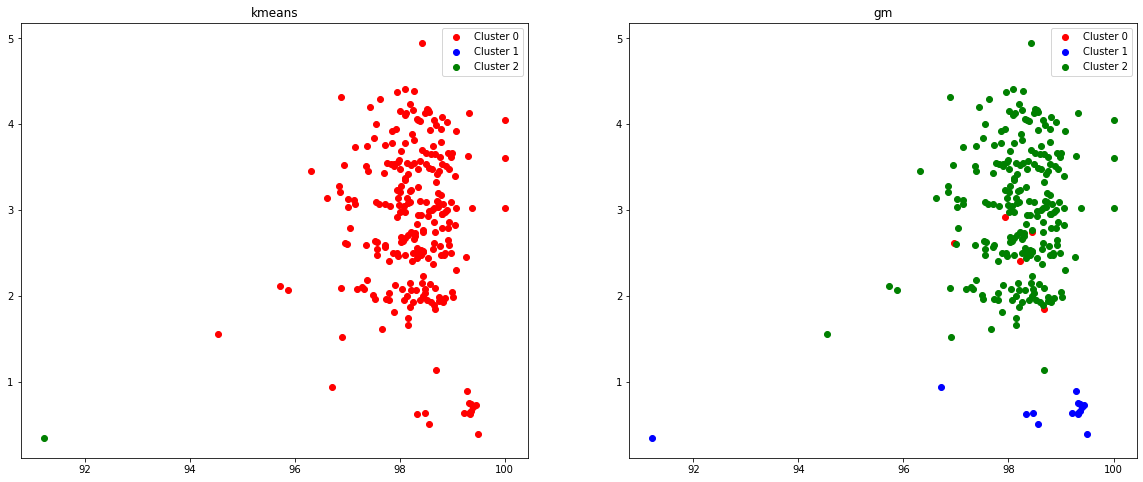

In [ ]:
plot_results(filtered_dataframe, 'maxcpu', 'avgcpu')

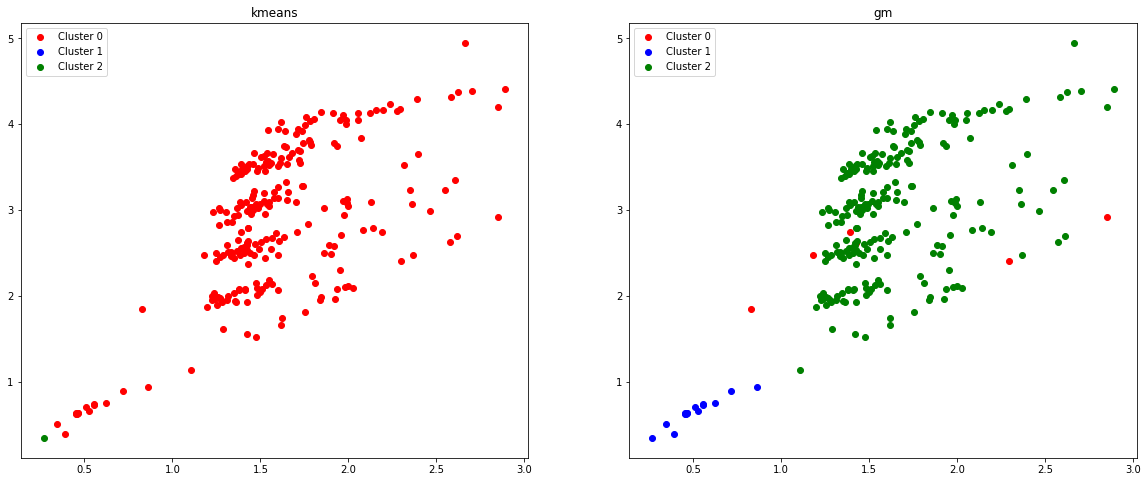

In [ ]:
plot_results(filtered_dataframe, 'p95maxcpu', 'avgcpu')

In [ ]:
filtered_dataframe.shape

(249, 19)

In [ ]:
filtered_dataframe['p95avgcpuslope'] = filtered_dataframe['p95maxcpu'] / filtered_dataframe['avgcpu']
filtered_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour,target,delmaxavg,delmaxp95,delp95avg,kmeans,gm,p95avgcpuslope
5,KSmFW5rsD8YdwtcJN2KAZAxKozv4uP2JpXhkDCZ9Robde6...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65700,2591400,98.004433,3.212958,1.656107,Delay-insensitive,4,32,701.583333,2806.333333,1,94.791475,96.348326,-1.556851,0,2,0.515446
7,QMAGiznbzlCFYU0bPBzaETsy2JqngJ4xdYpuomV+cTRiY/...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,97.430733,4.196203,2.849064,Delay-insensitive,4,32,701.666667,2806.666667,1,93.234530,94.581668,-1.347138,0,2,0.678963
8,45h9UId70NtLuIagbK5HeRkbT3XXKcgcv4X+B0RqyqjX32...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28800,2591400,99.000613,3.659729,1.461811,Delay-insensitive,4,32,711.833333,2847.333333,1,95.340884,97.538802,-2.197918,0,2,0.399432
11,FcG6ZGezY7BzUYWi/B9fdmI5KRMHP0YG3fGUPbS64zX5hW...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,85200,2591400,98.618475,2.997659,1.272409,Delay-insensitive,4,32,696.166667,2784.666667,1,95.620816,97.346066,-1.725250,0,2,0.424468
13,OJKSawi3+wL1cVSV2omsFFLJ7UwpyuDmgkSyv65oRxbzO2...,iCR1jKA81Ru+LOfdGhCmqRTOGiV1ge7ZDdx6syn+Kv3lfE...,T7R1B80jhR/A/xPaTYUXAjsmtaH+Zodkl+RnyISpUaveM0...,0,2591400,99.358450,0.663474,0.527467,Delay-insensitive,2,2,719.833333,1439.666667,1,98.694976,98.830983,-0.136007,0,1,0.795008


In [ ]:
filtered_dataframe['p95avgcpuslope'].describe()

count    249.000000
mean       0.589299
std        0.157907
min        0.389674
25%        0.463469
50%        0.539611
75%        0.683977
max        0.981969
Name: p95avgcpuslope, dtype: float64

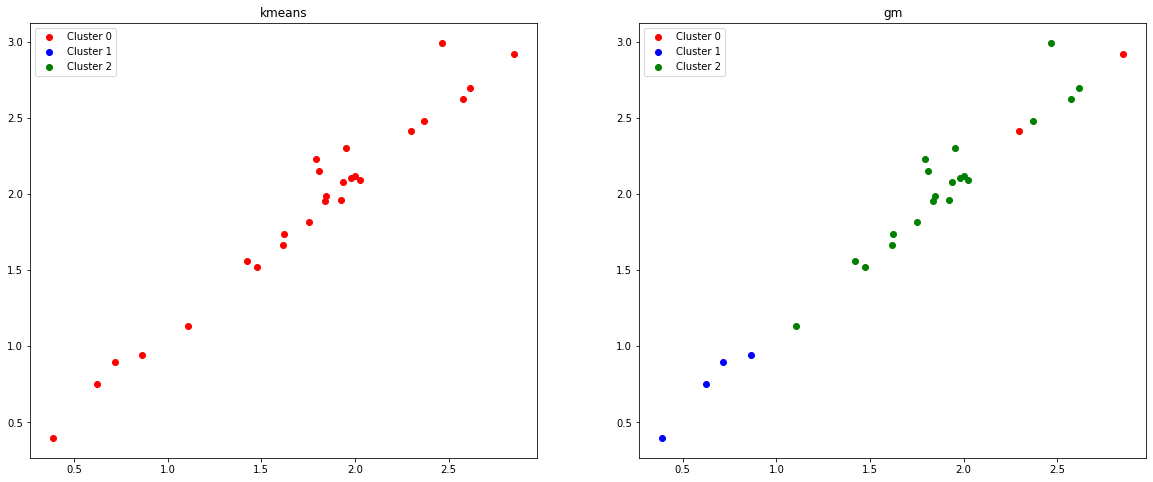

In [ ]:
filtered_dataframe = filtered_dataframe[filtered_dataframe['p95avgcpuslope'] > 0.8]
plot_results(filtered_dataframe, 'p95maxcpu', 'avgcpu')

In [ ]:
filtered_dataframe.shape

(26, 20)

In [ ]:
filtered_dataframe

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour,target,delmaxavg,delmaxp95,delp95avg,kmeans,gm,p95avgcpuslope
69,trjCc/lisNnKRnpFtPMmULgw1gUoiymSCshiGZfLY/Oil4...,9j4lLAdcydRsC+LhAQG/IS6Q15Z+tw3IYiCwH6QuxxtuQ1...,amCh31pwRrNqxYhYZMQ9kTaBv6Nsj9KELkMwZXIujmvpbm...,0,2591400,96.715705,0.938933,0.863622,Delay-insensitive,2,2,719.833333,1439.666667,1,95.776771,95.852083,-0.075311,0,1,0.919790
83,RVfel1jVo2UTjdHeqMgqJcVcfBUG/V9mV6Un47p8vGHiFj...,NM+rYlOuvfObftjnvrHy7hUorr5ulWm8UgTM9A1SZniRTv...,tGInpwc5Wi0Tq15xunBKLtsbC6Bxk5LP2e+NIsoDe/D3jg...,0,2589000,98.226568,2.410055,2.297678,Delay-insensitive,2,8,719.166667,1438.333333,1,95.816514,95.928891,-0.112377,0,0,0.953372
85,mY+fWVBQe0tTfdVMO/2Ea9AAjDyN2ndi/40U59iUNxiTRu...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28800,2591400,97.194277,2.076477,1.938042,Delay-insensitive,4,32,711.833333,2847.333333,1,95.117800,95.256236,-0.138435,0,2,0.933332
100,N0gBVBQviQ4n/jyolzXWac39GOcL3596Re7d2N7RpmffGF...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28500,2591400,98.838522,2.479152,2.367730,Delay-insensitive,4,32,711.916667,2847.666667,1,96.359369,96.470792,-0.111423,0,2,0.955056
155,4Cka/a5H763ZPaDuuNo6MhnfKQ56hvTrTxPgWmcJyh2ItB...,HzLK24LbYXd1kU9jw99gYFREpnAkKefq7MKwAxhEwzct60...,wggQWvknTcqrfDqxcQGGT40iu8/aEgjBj5i6e3bu9qtUc8...,0,2591400,99.278745,0.895093,0.716898,Delay-insensitive,2,2,719.833333,1439.666667,1,98.383652,98.561847,-0.178195,0,1,0.800920
183,HD22nCSvfLXG4Q3EFmcLoITCtHA3wgONq8RjxfSmQiQ+87...,NM+rYlOuvfObftjnvrHy7hUorr5ulWm8UgTM9A1SZniRTv...,tGInpwc5Wi0Tq15xunBKLtsbC6Bxk5LP2e+NIsoDe/D3jg...,0,2590800,97.938922,2.916118,2.851641,Delay-insensitive,2,8,719.666667,1439.333333,1,95.022804,95.087281,-0.064477,0,0,0.977889
205,gesjL49nFh9+u4fqJzmjpEYZIK7EqBySylYByqGy2JTisT...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,96.878754,2.092772,2.025108,Delay-insensitive,4,32,701.666667,2806.666667,1,94.785982,94.853645,-0.067663,0,2,0.967668
230,Ch2tshNe8XUZZEbV8/JCOJLI7AbSaZtEJ3A+f6UnX/Yf3R...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,98.547709,2.993244,2.465552,Delay-insensitive,4,32,701.666667,2806.666667,1,95.554465,96.082157,-0.527692,0,2,0.823706
245,GF6t1yYrx3ZHNBKP0d8t34RF5FhjRte7ojtULelKhVt03M...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,85500,2591400,96.901972,1.521770,1.475012,Delay-insensitive,4,32,696.083333,2784.333333,1,95.380202,95.426961,-0.046759,0,2,0.969274
258,PNj1J6v0YJ7TQ992Tyl3yCLsvh8sGpq7TJumZV8e+KUEUn...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,84900,2591400,98.439078,2.230020,1.791253,Delay-insensitive,4,32,696.250000,2785.000000,1,96.209058,96.647824,-0.438767,0,2,0.803245


In [ ]:
filtered_dataframe.to_csv('final_filtered.csv')

In [ ]:
filtered_dataframe

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour,target,delmaxavg,delmaxp95,delp95avg,kmeans,gm,p95avgcpuslope
69,trjCc/lisNnKRnpFtPMmULgw1gUoiymSCshiGZfLY/Oil4...,9j4lLAdcydRsC+LhAQG/IS6Q15Z+tw3IYiCwH6QuxxtuQ1...,amCh31pwRrNqxYhYZMQ9kTaBv6Nsj9KELkMwZXIujmvpbm...,0,2591400,96.715705,0.938933,0.863622,Delay-insensitive,2,2,719.833333,1439.666667,1,95.776771,95.852083,-0.075311,0,1,0.919790
83,RVfel1jVo2UTjdHeqMgqJcVcfBUG/V9mV6Un47p8vGHiFj...,NM+rYlOuvfObftjnvrHy7hUorr5ulWm8UgTM9A1SZniRTv...,tGInpwc5Wi0Tq15xunBKLtsbC6Bxk5LP2e+NIsoDe/D3jg...,0,2589000,98.226568,2.410055,2.297678,Delay-insensitive,2,8,719.166667,1438.333333,1,95.816514,95.928891,-0.112377,0,0,0.953372
85,mY+fWVBQe0tTfdVMO/2Ea9AAjDyN2ndi/40U59iUNxiTRu...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28800,2591400,97.194277,2.076477,1.938042,Delay-insensitive,4,32,711.833333,2847.333333,1,95.117800,95.256236,-0.138435,0,2,0.933332
100,N0gBVBQviQ4n/jyolzXWac39GOcL3596Re7d2N7RpmffGF...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,28500,2591400,98.838522,2.479152,2.367730,Delay-insensitive,4,32,711.916667,2847.666667,1,96.359369,96.470792,-0.111423,0,2,0.955056
155,4Cka/a5H763ZPaDuuNo6MhnfKQ56hvTrTxPgWmcJyh2ItB...,HzLK24LbYXd1kU9jw99gYFREpnAkKefq7MKwAxhEwzct60...,wggQWvknTcqrfDqxcQGGT40iu8/aEgjBj5i6e3bu9qtUc8...,0,2591400,99.278745,0.895093,0.716898,Delay-insensitive,2,2,719.833333,1439.666667,1,98.383652,98.561847,-0.178195,0,1,0.800920
183,HD22nCSvfLXG4Q3EFmcLoITCtHA3wgONq8RjxfSmQiQ+87...,NM+rYlOuvfObftjnvrHy7hUorr5ulWm8UgTM9A1SZniRTv...,tGInpwc5Wi0Tq15xunBKLtsbC6Bxk5LP2e+NIsoDe/D3jg...,0,2590800,97.938922,2.916118,2.851641,Delay-insensitive,2,8,719.666667,1439.333333,1,95.022804,95.087281,-0.064477,0,0,0.977889
205,gesjL49nFh9+u4fqJzmjpEYZIK7EqBySylYByqGy2JTisT...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,96.878754,2.092772,2.025108,Delay-insensitive,4,32,701.666667,2806.666667,1,94.785982,94.853645,-0.067663,0,2,0.967668
230,Ch2tshNe8XUZZEbV8/JCOJLI7AbSaZtEJ3A+f6UnX/Yf3R...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,65400,2591400,98.547709,2.993244,2.465552,Delay-insensitive,4,32,701.666667,2806.666667,1,95.554465,96.082157,-0.527692,0,2,0.823706
245,GF6t1yYrx3ZHNBKP0d8t34RF5FhjRte7ojtULelKhVt03M...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,85500,2591400,96.901972,1.521770,1.475012,Delay-insensitive,4,32,696.083333,2784.333333,1,95.380202,95.426961,-0.046759,0,2,0.969274
258,PNj1J6v0YJ7TQ992Tyl3yCLsvh8sGpq7TJumZV8e+KUEUn...,8mYUop47Ih3Ka0m8+fxnNmM1rUjlJ9vDkclgoBJViVmWPr...,fIRf+CYG8jmlnysPUgzCuo7L/D1tV9jirr4FaJCQtaI7/n...,84900,2591400,98.439078,2.230020,1.791253,Delay-insensitive,4,32,696.250000,2785.000000,1,96.209058,96.647824,-0.438767,0,2,0.803245


In [ ]:
filtered_dataframe = filtered_dataframe[filtered_dataframe['vmcorecountbucket'] == 4]
filtered_dataframe.shape

(17, 20)

In [ ]:
filtered_dataframe.vmid

85     mY+fWVBQe0tTfdVMO/2Ea9AAjDyN2ndi/40U59iUNxiTRu...
100    N0gBVBQviQ4n/jyolzXWac39GOcL3596Re7d2N7RpmffGF...
205    gesjL49nFh9+u4fqJzmjpEYZIK7EqBySylYByqGy2JTisT...
230    Ch2tshNe8XUZZEbV8/JCOJLI7AbSaZtEJ3A+f6UnX/Yf3R...
245    GF6t1yYrx3ZHNBKP0d8t34RF5FhjRte7ojtULelKhVt03M...
258    PNj1J6v0YJ7TQ992Tyl3yCLsvh8sGpq7TJumZV8e+KUEUn...
265    aa1PrVE9ieaRTobFuCsEK1LK0f0/nrqryHIRfPhadFJHg3...
292    YDo5PVK/75LT5zQJyFNafQ81zT5a5FDeCK/dhRRaVWU2GJ...
311    XpTL07/3itkUclfOTvI2nBD49+uCBCAUD5jx7El/4YhAKQ...
320    cFHdzRkmxhKWOVCWwHjtRH9TVHVkwtnCb7WlXKI7bCdm6s...
339    FXoWmAfKugZ5oYGzaouQN/szW03kSA2RayVC+YjKo8Xq0l...
399    bImCpIMf2HKgje7Dhiny++Km4PB/Q4upcjrH/bitFIJTmU...
410    l93uKkSTv8kpeTaz+6RQfgXIIhW8MRm+jdX6qZUiWKtaBa...
428    rr2y46iWRII1abo5vnCXmFH7+7Ovuzmav2wK5Zt2u4tJIs...
508    VmgiCwYcPyuVKNKLhzm6xUxJ4jsMK8T6YG93Pi3zQs/VZ5...
509    gQI5vMY9+5Al0VB75TauNTv3cQsFymksKJt1NG/q8XH82B...
525    KxsOjS16uUQHzMcaCAw/0auAXsRsyJrl/OWMA4j2cuYkKC...
Name: vmid, dtype: object